In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load data from file
file_path = "./result_table.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head(20)


,Country,Average number of usual weekly hours of work in main job,"Monthly minimum wages, euro","Lending rate, %","GPD per capita, $",Human Development Index,Household estimate (tonnes/year),Food service estimate (tonnes/year),Retail estimate (tonnes/year)
0,Austria,36.0,1750.00,5.08,69.069,0.916,"349,249","254,191","77,289"
1,Belarus,35.5,179.00,9.50,24.017,0.808,"646,356","261,341","147,838"
2,Belgium,36.9,1994.18,4.50,65.813,0.937,"576,036","227,371","112,100"
3,Bulgaria,40.2,477.04,3.80,33.780,0.795,"478,667","193,539","109,483"
4,Canada,35.1,1924.00,5.00,59.813,0.936,"2,938,321","956,615","479,284"
5,Croatia,39.6,840.00,5.29,42.873,0.858,"348,070","105,613","52,915"
6,Czechia,39.8,764.44,6.75,49.025,0.889,"746,840","273,327","136,943"
7,Denmark,35.4,2850.00,3.88,74.958,0.948,"469,449","119,134","172,003"
8,Estonia,38.0,820.00,6.86,45.236,0.890,"102,743","22,013","6,243"
9,Finland,36.2,2600.00,5.24,59.869,0.940,"361,937","128,927","70,875"


In [3]:

# Look for numbers with commas in the specified columns and replace commas with dots
columns_to_fix_numeric = ['Monthly minimum wages, USD', 'GPD per capita, $']
data[columns_to_fix_numeric] = data[columns_to_fix_numeric].replace({',': ''}, regex=True).astype(float)

# Define columns with values in the format "  854,855 "
columns_to_fix_format = ['Household estimate (tonnes/year)', 'Food service estimate (tonnes/year)', 'Retail estimate (tonnes/year)']
data[columns_to_fix_format] = data[columns_to_fix_format].replace({',': '', ' ': '', '"': ''}, regex=True).astype(float)

# Save the updated DataFrame to a new file (replace 'updated_dataset.csv' with the desired file name)
data.to_csv('updated_dataset.csv', index=False)



In [4]:


# Load your dataset into a DataFrame (replace 'your_dataset.csv' with the actual path to your file)
data = pd.read_csv('updated_dataset.csv')

# Standardize column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Print the updated column names
print(data.columns)


Index(['country', 'average_number_of_usual_weekly_hours_of_work_in_main_job',
       'monthly_minimum_wages,_euro', 'lending_rate,_%', 'gpd_per_capita,_$',
       'human_development_index', 'household_estimate_tonnes/year',
       'food_service_estimate_tonnes/year', 'retail_estimate_tonnes/year'],
      dtype='object')


In [5]:
# Add a new column that is the sum of existing columns
data['total_estimate_tonnes/year'] = data['household_estimate_tonnes/year'] + data['food_service_estimate_tonnes/year'] + data['retail_estimate_tonnes/year']

# Print the updated DataFrame with the new column
print(data.head())


    country  average_number_of_usual_weekly_hours_of_work_in_main_job  \
0   Austria                                               36.0          
1   Belarus                                               35.5          
2   Belgium                                               36.9          
3  Bulgaria                                               40.2          
4    Canada                                               35.1          

   monthly_minimum_wages,_euro  lending_rate,_%  gpd_per_capita,_$  \
0                      1750.00             5.08             69.069   
1                       179.00             9.50             24.017   
2                      1994.18             4.50             65.813   
3                       477.04             3.80             33.780   
4                      1924.00             5.00             59.813   

   human_development_index  household_estimate_tonnes/year  \
0                    0.916                        349249.0   
1               

       average_number_of_usual_weekly_hours_of_work_in_main_job  \
count                                          36.000000          
mean                                           38.202778          
std                                             2.214818          
min                                            33.200000          
25%                                            36.350000          
50%                                            38.500000          
75%                                            39.600000          
max                                            43.300000          

       monthly_minimum_wages,_euro  lending_rate,_%  gpd_per_capita,_$  \
count                    36.000000        36.000000          36.000000   
mean                   1433.226667         6.033611          57.895250   
std                     848.595732         2.910742          26.531874   
min                     170.000000         1.750000          14.304000   
25%                     76

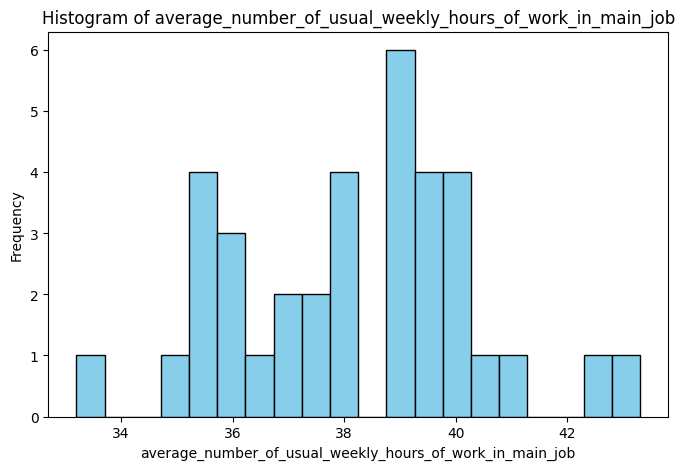

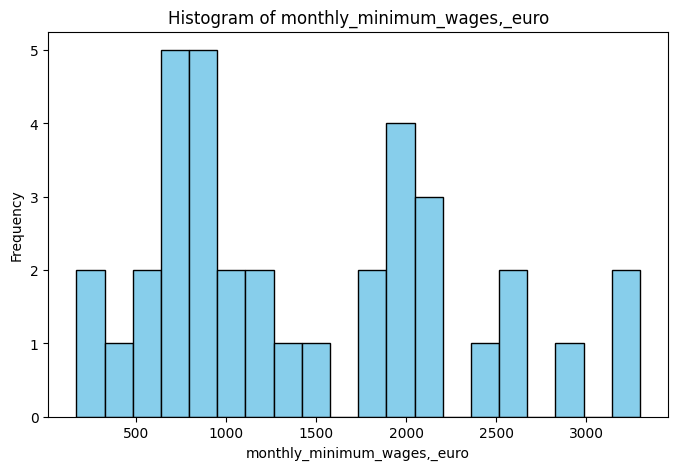

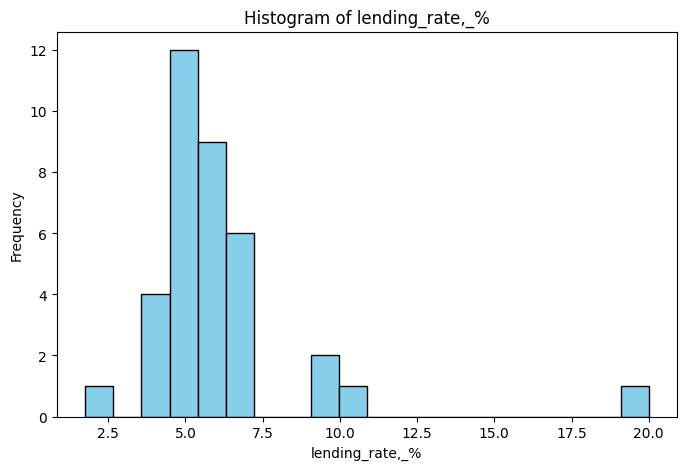

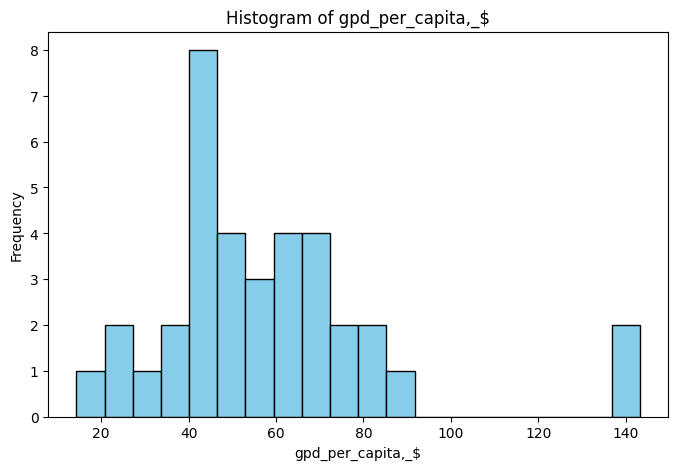

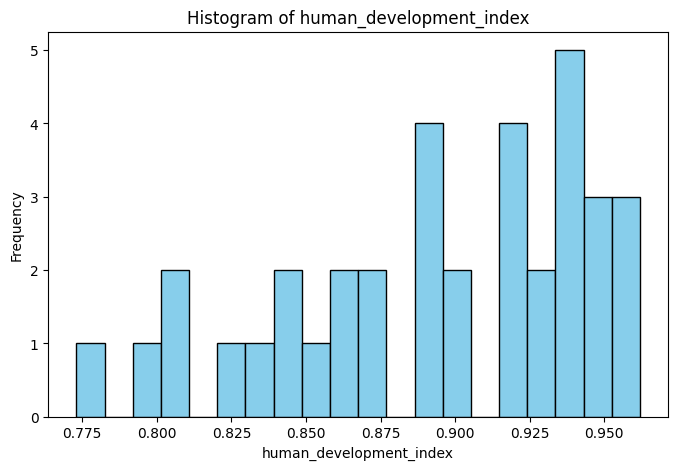

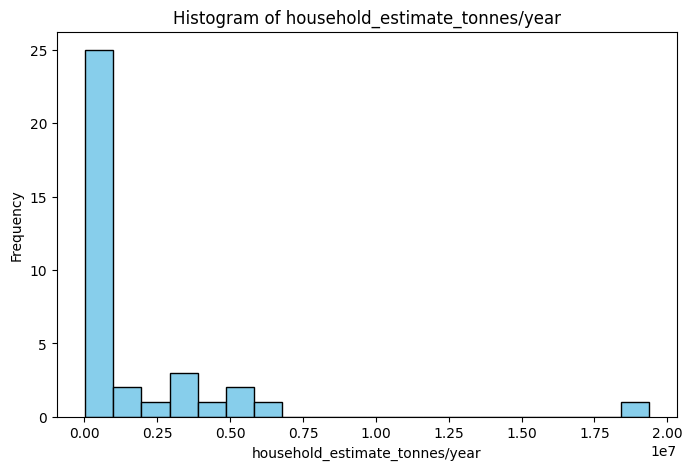

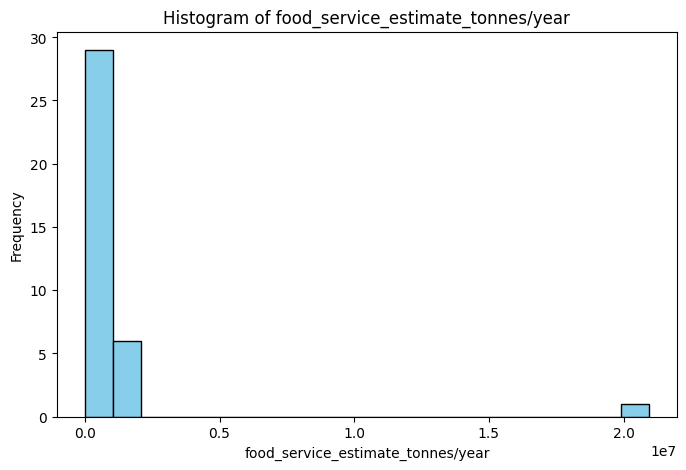

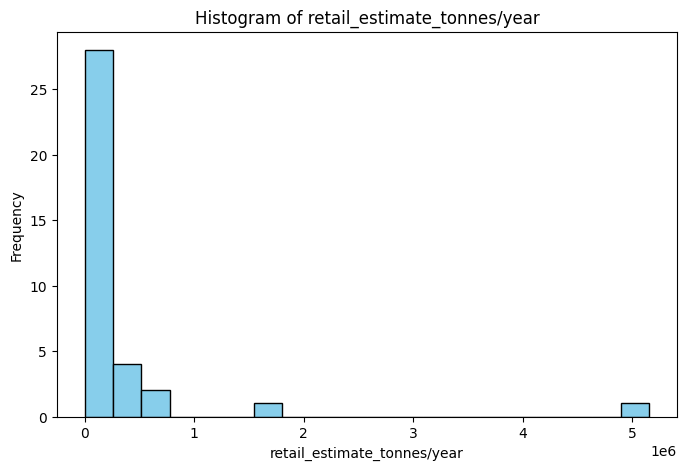

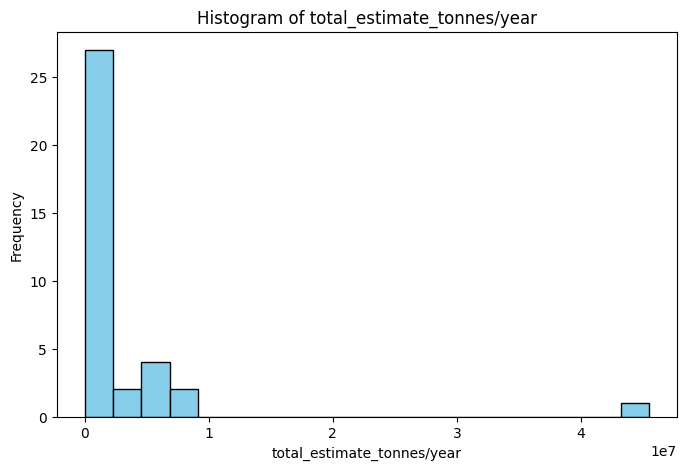

In [6]:
# Examine basic statistical measures for each numeric column (mean, median, standard deviation).

# Descriptive statistics
descriptive_stats = data.describe()

# Display descriptive statistics
print(descriptive_stats)

# Histograms
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [7]:
#This code calculates the correlation matrix, which shows the correlation coefficients between all pairs of numeric columns in your dataset.
# Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to zero suggest a weak correlation.

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                                                    average_number_of_usual_weekly_hours_of_work_in_main_job  \
average_number_of_usual_weekly_hours_of_work_in...                                           1.000000          
monthly_minimum_wages,_euro                                                                 -0.626721          
lending_rate,_%                                                                              0.217157          
gpd_per_capita,_$                                                                           -0.477986          
human_development_index                                                                     -0.612318          
household_estimate_tonnes/year                                                              -0.221862          
food_service_estimate_tonnes/year                                                           -0.175048          
retail_estimate_tonnes/year                                                                 -0.184706   

In [8]:
# Define bins and labels for economic development categories
bins = [data['gpd_per_capita,_$'].min(), data['gpd_per_capita,_$'].quantile(0.33), data['gpd_per_capita,_$'].quantile(0.66), data['gpd_per_capita,_$'].max()]
labels = ['Low', 'Medium', 'High']

# Create a new column 'economic_development' based on GDP per capita categories
data['economic_development'] = pd.cut(data['gpd_per_capita,_$'], bins=bins, labels=labels, include_lowest=True)

# Group by economic development categories and calculate average waste production
grouped_data = data.groupby('economic_development').agg({
    'household_estimate_tonnes/year': 'mean',
    'food_service_estimate_tonnes/year': 'mean',
    'retail_estimate_tonnes/year': 'mean'
}).reset_index()

# Display the grouped data
print(grouped_data)





  economic_development  household_estimate_tonnes/year  \
0                  Low                    8.941789e+05   
1               Medium                    2.083617e+06   
2                 High                    2.506147e+06   

   food_service_estimate_tonnes/year  retail_estimate_tonnes/year  
0                       2.756019e+05                151680.666667  
1                       6.604544e+05                333595.833333  
2                       2.046908e+06                546238.583333  


C:\Users\deer1\AppData\Local\Temp\ipykernel_4196\1021577781.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby('economic_development').agg({


In [9]:
# Display the countries in each economic development category
for level in labels:
    countries_in_level = data[data['economic_development'] == level]['country'].tolist()
    print(f"Countries in {level} Economic Development Level:", countries_in_level)




Countries in Low Economic Development Level: ['Belarus', 'Bulgaria', 'Croatia', 'Greece', 'Hungary', 'Latvia', 'Montenegro', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Ukraine']
Countries in Medium Economic Development Level: ['Canada', 'Czechia', 'Estonia', 'Finland', 'France', 'Italy', 'Lithuania', 'Malta', 'Poland', 'Slovenia', 'Spain', 'UK']
Countries in High Economic Development Level: ['Austria', 'Belgium', 'Denmark', 'Germany', 'Iceland', 'Ireland', 'Luxembourg', 'Netherlands', 'Norway', 'Sweden', 'Switzerland', 'USA']


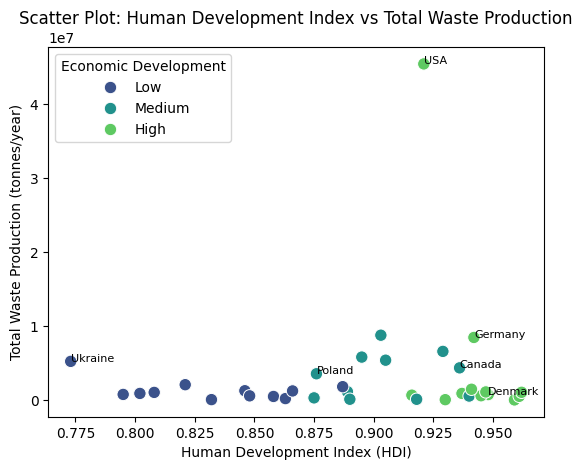

In [10]:
# Create a scatter plot
scatter_plot = sns.scatterplot(x='human_development_index', y='total_estimate_tonnes/year', data=data, hue='economic_development', palette='viridis', s=80)

# Title and axis labels
plt.title('Scatter Plot: Human Development Index vs Total Waste Production')
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Total Waste Production (tonnes/year)')

# Legend with labels for each economic development level
plt.legend(title='Economic Development')

# Specify the countries to include in the plot
selected_countries = ['Denmark', 'USA', 'Canada', 'Germany', 'Ukraine','Poland']

# Annotate each point with country names for selected countries
for i, country in enumerate(data['country']):
    if country in selected_countries:
        scatter_plot.text(data['human_development_index'].iloc[i], data['total_estimate_tonnes/year'].iloc[i], country, fontsize=8)

# Show the plot
plt.show()



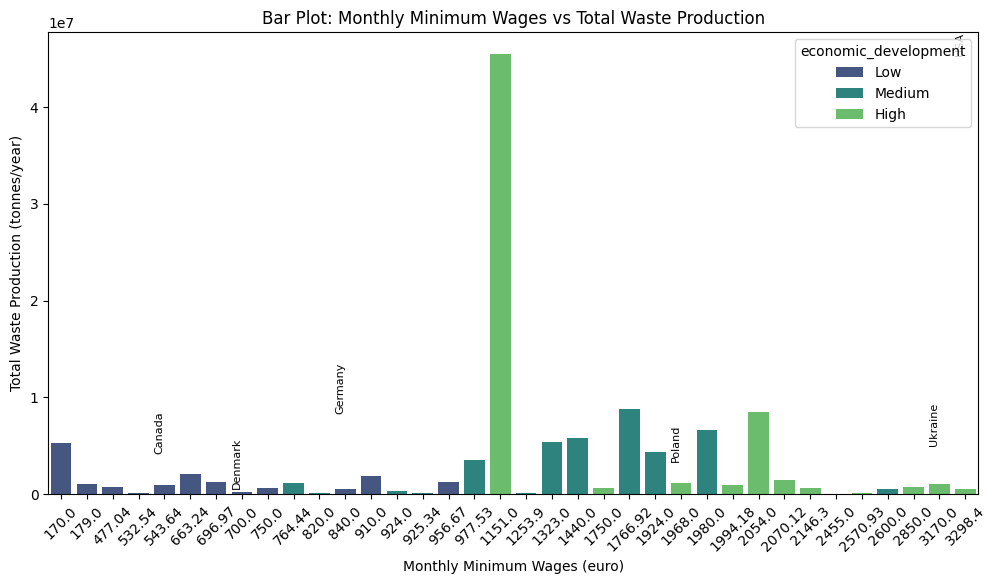

In [11]:
# Figure size
plt.figure(figsize=(12, 6))

# Create a bar plot using seaborn with hue for economic development
ax = sns.barplot(x='monthly_minimum_wages,_euro', y='total_estimate_tonnes/year', hue='economic_development', data=data, palette='viridis')

# Specify the countries to include in the plot
selected_countries = ['Denmark', 'USA', 'Canada', 'Germany', 'Ukraine', 'USA','Poland']

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Annotate each bar with country names for selected countries
for i, country in enumerate(data['country']):
    if country in selected_countries:
        ax.text(i, data['total_estimate_tonnes/year'].iloc[i] + 10, country, rotation=90, ha='right', fontsize=8)

# Title and axis labels
plt.title('Bar Plot: Monthly Minimum Wages vs Total Waste Production')
plt.xlabel('Monthly Minimum Wages (euro)')
plt.ylabel('Total Waste Production (tonnes/year)')

# Show the plot
plt.show()



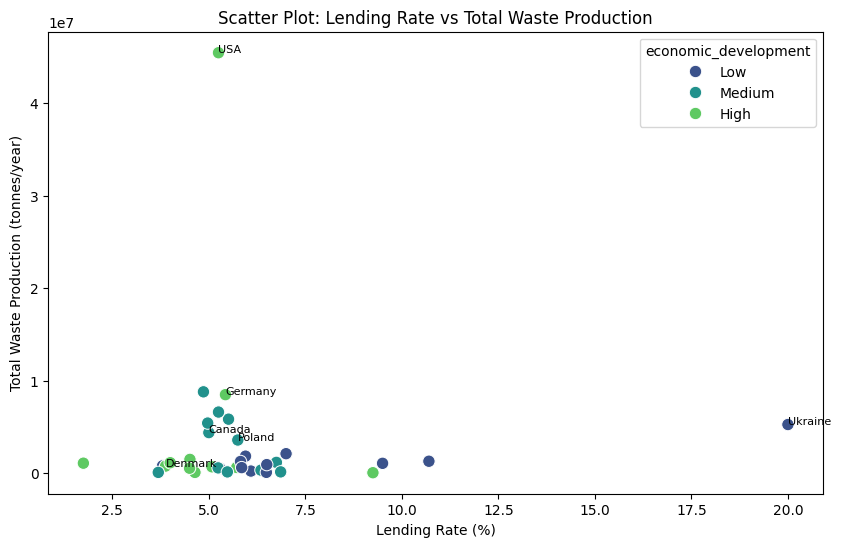

In [12]:
# Figure size
plt.figure(figsize=(10, 6))

# Specify the countries to include in the plot
selected_countries = ['Denmark', 'USA', 'Canada', 'Germany', 'Ukraine','Poland']

# Create a scatter plot for Lending Rate vs Total Waste Production
scatter_plot = sns.scatterplot(x=data['lending_rate,_%'], y='total_estimate_tonnes/year', hue='economic_development', data=data, palette='viridis', s=80)

# Annotate each point with country names for selected countries
for i, country in enumerate(data['country']):
    if country in selected_countries:
        scatter_plot.text(data['lending_rate,_%'].iloc[i], data['total_estimate_tonnes/year'].iloc[i], country, fontsize=8)

# Title and axis labels
plt.title('Scatter Plot: Lending Rate vs Total Waste Production')
plt.xlabel('Lending Rate (%)')
plt.ylabel('Total Waste Production (tonnes/year)')

# Show the plot
plt.show()




In [13]:
import statsmodels.api as sm

# Select relevant columns for regression
selected_columns = ['average_number_of_usual_weekly_hours_of_work_in_main_job', 'monthly_minimum_wages,_euro', 'lending_rate,_%', 'gpd_per_capita,_$', 'human_development_index']

# Add a constant term to the independent variables
X = sm.add_constant(data[selected_columns])

# Dependent variable
y = data['total_estimate_tonnes/year']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression summary
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     total_estimate_tonnes/year   R-squared:                       0.156
Model:                                    OLS   Adj. R-squared:                  0.015
Method:                         Least Squares   F-statistic:                     1.106
Date:                        Sat, 17 Feb 2024   Prob (F-statistic):              0.378
Time:                                17:17:03   Log-Likelihood:                -618.09
No. Observations:                          36   AIC:                             1248.
Df Residuals:                              30   BIC:                             1258.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----

['Austria' 'Belarus' 'Belgium' 'Bulgaria' 'Canada' 'Croatia' 'Czechia'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta'
 'Montenegro' 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland' 'UK'
 'Ukraine' 'USA']


C:\Users\deer1\AppData\Local\Temp\ipykernel_4196\1926810184.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


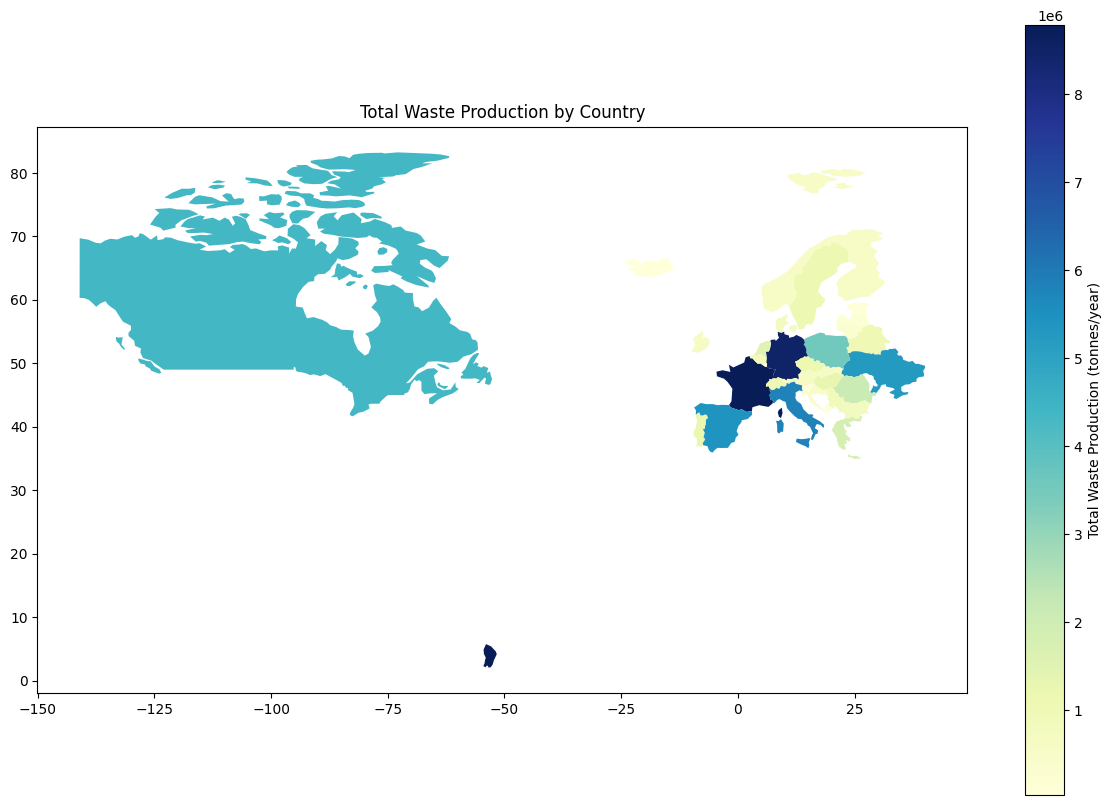

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt

print(data['country'].unique())

# Load geographical data for countries (replace 'world' with a specific file if you have one)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge geographical data with waste production data
merged_data = world.merge(data, left_on='name', right_on='country')

# Create maps displaying waste production by countries
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='total_estimate_tonnes/year', ax=ax, legend=True, cmap='YlGnBu', legend_kwds={'label': "Total Waste Production (tonnes/year)"})
ax.set_title('Total Waste Production by Country')
plt.show()





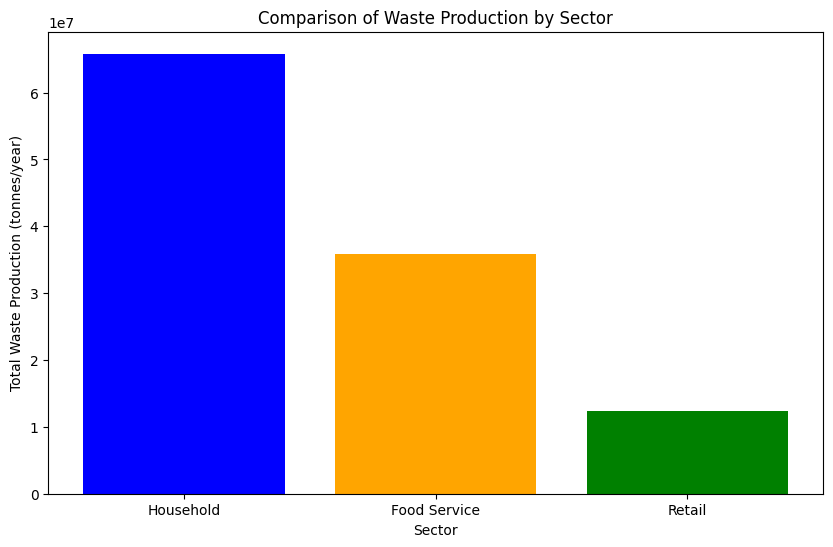

In [28]:
# Define data for comparison
sectors = ['Household', 'Food Service', 'Retail']
waste_production = [data['household_estimate_tonnes/year'].sum(),
                    data['food_service_estimate_tonnes/year'].sum(),
                    data['retail_estimate_tonnes/year'].sum()]

# Build a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sectors, waste_production, color=['blue', 'orange', 'green'])
plt.title('Comparison of Waste Production by Sector')
plt.xlabel('Sector')
plt.ylabel('Total Waste Production (tonnes/year)')
plt.show()
